In [54]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
sns.set()



In [55]:
#Reading the data from the present working directory
data=pd.read_csv("diabetes1.csv")
data.head(20)#seeing the first 20 records

,f1,f2,f3,f4,f5,f6,f7,f8,Outcome
0,148.0,50.0,33.6,72.0,35,6,0.0,0.627,1
1,85.0,31.0,26.6,66.0,29,1,0.0,0.351,0
2,183.0,32.0,23.3,64.0,0,8,0.0,0.672,1
3,89.0,21.0,28.1,66.0,23,1,94.0,0.167,0
4,137.0,33.0,43.1,40.0,35,0,NaN,2.288,1
5,116.0,30.0,25.6,74.0,0,5,NaN,0.201,0
6,78.0,26.0,31.0,50.0,32,3,NaN,0.248,1
7,115.0,29.0,35.3,0.0,0,10,0.0,0.134,0
8,197.0,53.0,30.5,70.0,45,2,543.0,0.158,1
9,125.0,54.0,0.0,96.0,0,8,0.0,0.232,1


In [56]:
data.shape#knowing the shape of the dataframe,total rows and columns

(768, 9)

In [57]:
data.info()#information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   f1       764 non-null    float64
 1   f2       765 non-null    float64
 2   f3       768 non-null    float64
 3   f4       763 non-null    float64
 4   f5       768 non-null    int64  
 5   f6       768 non-null    int64  
 6   f7       765 non-null    float64
 7   f8       768 non-null    float64
 8   Outcome  768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [58]:
data.isna().sum()#checking how many null columns in dataset

f1         4
f2         3
f3         0
f4         5
f5         0
f6         0
f7         3
f8         0
Outcome    0
dtype: int64

In [59]:
data.describe()#describing the dataset

,f1,f2,f3,f4,f5,f6,f7,f8,Outcome
count,764.000000,765.000000,768.000000,763.000000,768.000000,768.000000,765.000000,768.000000,768.000000
mean,120.798429,33.270588,31.992578,69.044561,20.536458,3.845052,79.777778,0.471876,0.348958
std,31.920711,11.771215,7.884160,19.380852,15.952218,3.369578,115.389451,0.331329,0.476951
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,99.000000,24.000000,27.300000,62.000000,0.000000,1.000000,0.000000,0.243750,0.000000
50%,117.000000,29.000000,32.000000,72.000000,23.000000,3.000000,29.000000,0.372500,0.000000
75%,140.000000,41.000000,36.600000,80.000000,32.000000,6.000000,127.000000,0.626250,1.000000
max,199.000000,81.000000,67.100000,122.000000,99.000000,17.000000,846.000000,2.420000,1.000000


In [60]:
#filling all the Nan vallues with zeros
data["f1"]=data["f1"].fillna(0)
data["f2"]=data["f2"].fillna(0)
data["f4"]=data["f4"].fillna(0)
data["f7"]=data["f7"].fillna(0)


In [61]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.169271,33.140625,31.992578,68.595052,20.536458,3.845052,79.466146,0.471876,0.348958
std,33.004879,11.930307,7.884160,20.100823,15.952218,3.369578,115.271174,0.331329,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,99.000000,24.000000,27.300000,62.000000,0.000000,1.000000,0.000000,0.243750,0.000000
50%,117.000000,29.000000,32.000000,72.000000,23.000000,3.000000,24.000000,0.372500,0.000000
75%,140.000000,41.000000,36.600000,80.000000,32.000000,6.000000,126.250000,0.626250,1.000000
max,199.000000,81.000000,67.100000,122.000000,99.000000,17.000000,846.000000,2.420000,1.000000


In [62]:
#filling each column zeros with the mean of each column
data["f1"]=data["f1"].fillna(data["f1"].mean())
data["f2"]=data["f2"].fillna(data["f2"].mean())
data["f4"]=data["f4"].fillna(data["f4"].mean())
data["f7"]=data["f7"].fillna(data["f7"].mean())

In [63]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.169271,33.140625,31.992578,68.595052,20.536458,3.845052,79.466146,0.471876,0.348958
std,33.004879,11.930307,7.884160,20.100823,15.952218,3.369578,115.271174,0.331329,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,99.000000,24.000000,27.300000,62.000000,0.000000,1.000000,0.000000,0.243750,0.000000
50%,117.000000,29.000000,32.000000,72.000000,23.000000,3.000000,24.000000,0.372500,0.000000
75%,140.000000,41.000000,36.600000,80.000000,32.000000,6.000000,126.250000,0.626250,1.000000
max,199.000000,81.000000,67.100000,122.000000,99.000000,17.000000,846.000000,2.420000,1.000000


In [64]:
data.isna().sum()

f1         0
f2         0
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
Outcome    0
dtype: int64

In [65]:
data.columns

Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'Outcome'], dtype='object')

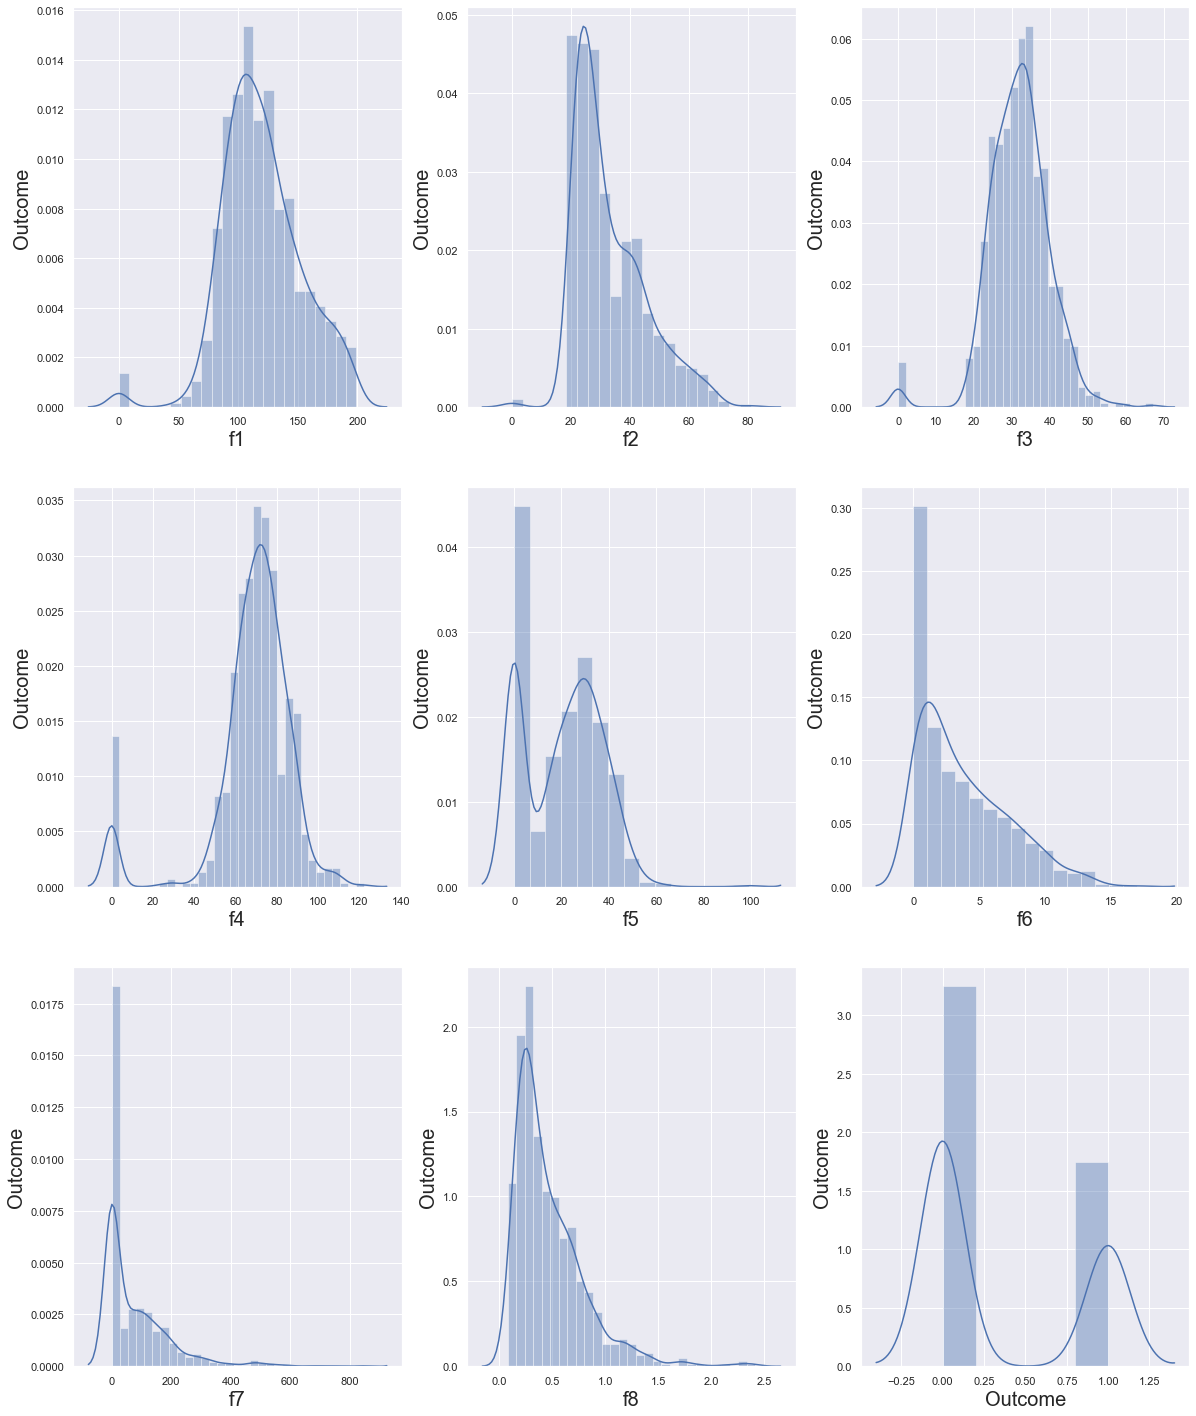

In [66]:
#seeing how is data is distributed for every column
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Outcome",fontsize=20)
    plotnumber+=1
plt.show()
        

In [67]:
#replacing zeros with the mean of the columns f1,f2,f3,f4,f5,f6,f7
data["f1"]=data["f1"].replace(0,data["f1"].mean())
data["f2"]=data["f2"].replace(0,data["f2"].mean())
data["f3"]=data["f3"].replace(0,data["f3"].mean())
data["f4"]=data["f4"].replace(0,data["f4"].mean())
data["f5"]=data["f5"].replace(0,data["f5"].mean())
#data["f6"]=data["f6"].replace(0,data["f6"].mean())
data["f7"]=data["f7"].replace(0,data["f7"].mean())


In [68]:
data.isna().sum()

f1         0
f2         0
f3         0
f4         0
f5         0
f6         0
f7         0
f8         0
Outcome    0
dtype: int64

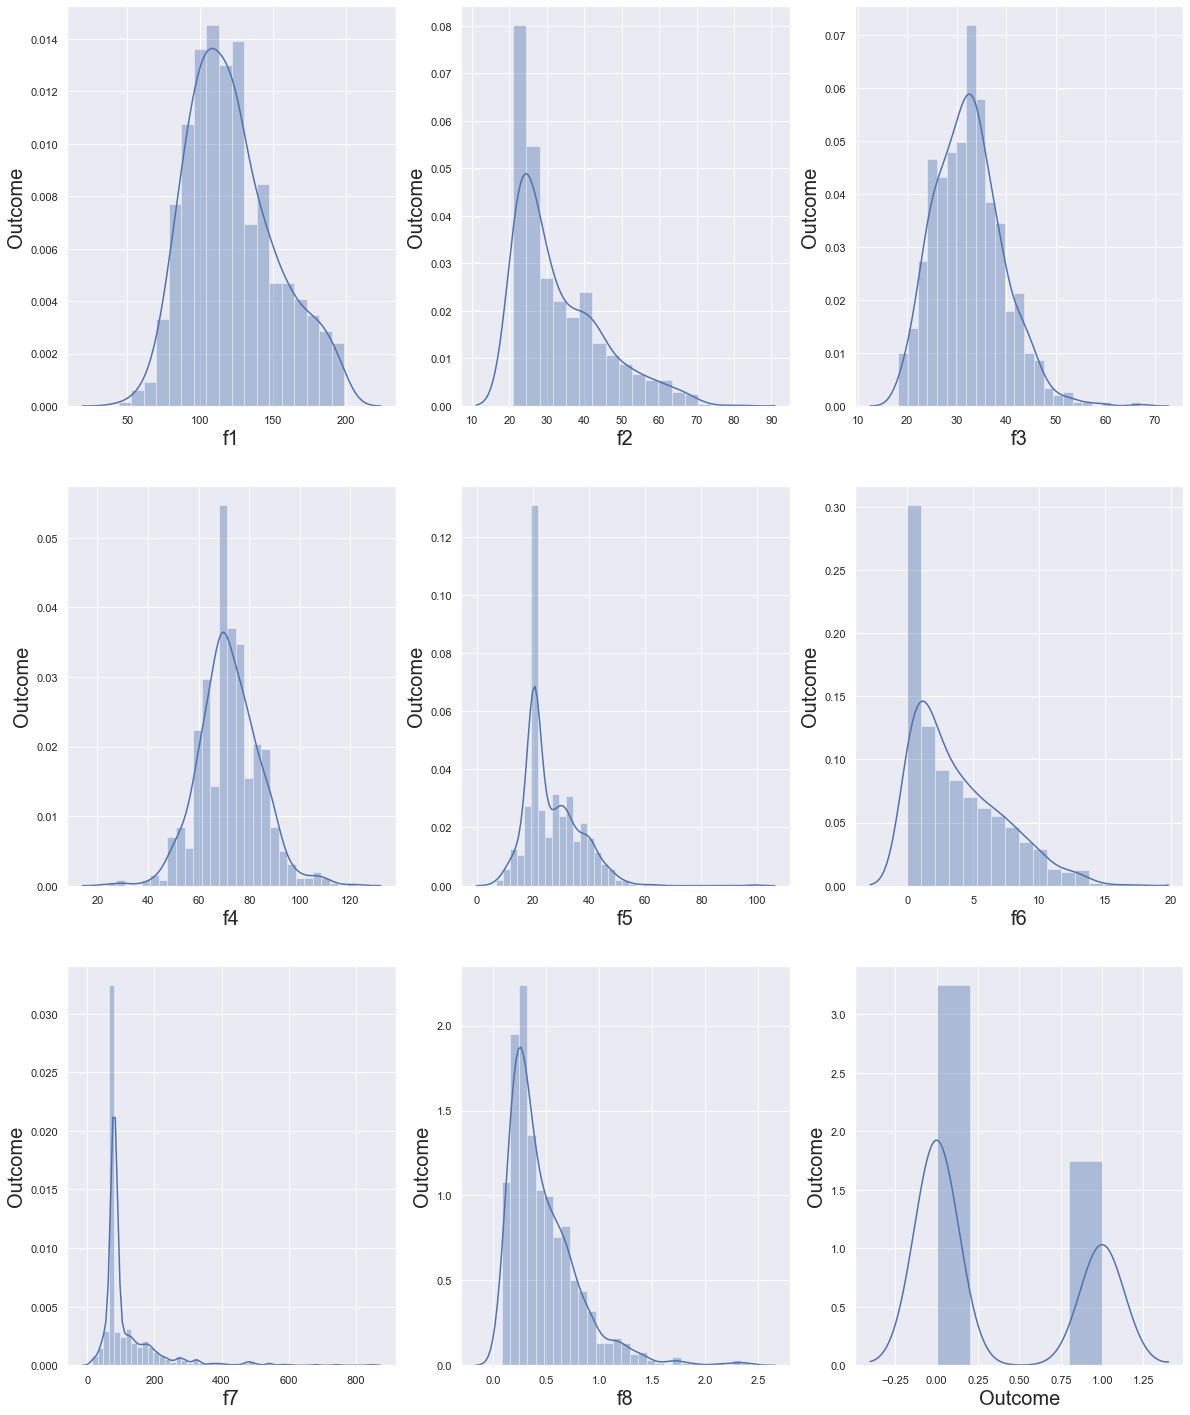

In [69]:
#Now seeing how the data is distributed over every column without zeros
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Outcome",fontsize=20)
    plotnumber+=1
plt.show()

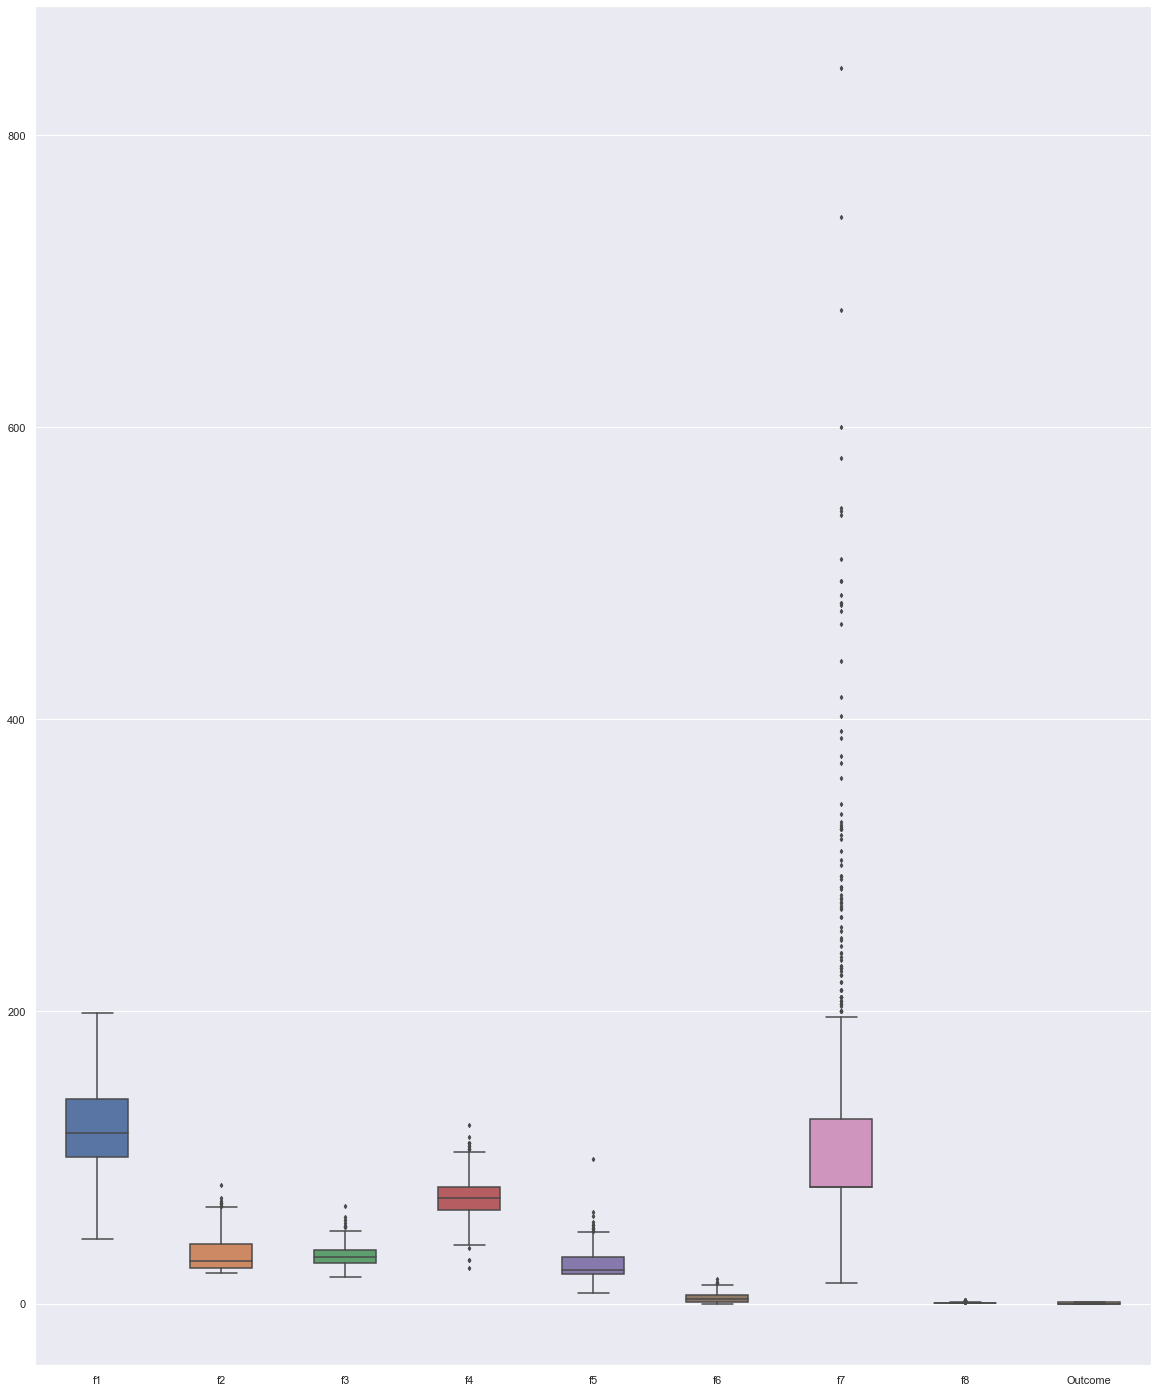

In [70]:
#plotting the data in box plot to see the outliers

fig,ax=plt.subplots(figsize=(20,25))
sns.boxplot(data=data,width=0.5,ax=ax, fliersize=3)


In [71]:
#removing the top 1% data from the f2 column
q=data["f2"].quantile(0.99)
data_cleaned=data[data["f2"]<q]

#removing the top 1% data from the f3 column
q=data_cleaned["f3"].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned["f3"]<q]

#removing the top 1% data from the f4 column
q=data_cleaned["f4"].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned["f4"]<q]

#removing the top 2% data from the f5 column
q=data_cleaned["f5"].quantile(0.98)
data_cleaned=data_cleaned[data_cleaned["f5"]<q]


#removing the top 1% data from the f6 column
q=data_cleaned["f6"].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned["f6"]<q]

#removing the top 5% data from the f7 column
q=data_cleaned["f7"].quantile(0.95)
data_cleaned=data_cleaned[data_cleaned["f7"]<q]

#removing the top 1% data from the f8 column
q=data_cleaned["f8"].quantile(0.99)
data_cleaned=data_cleaned[data_cleaned["f8"]<q]


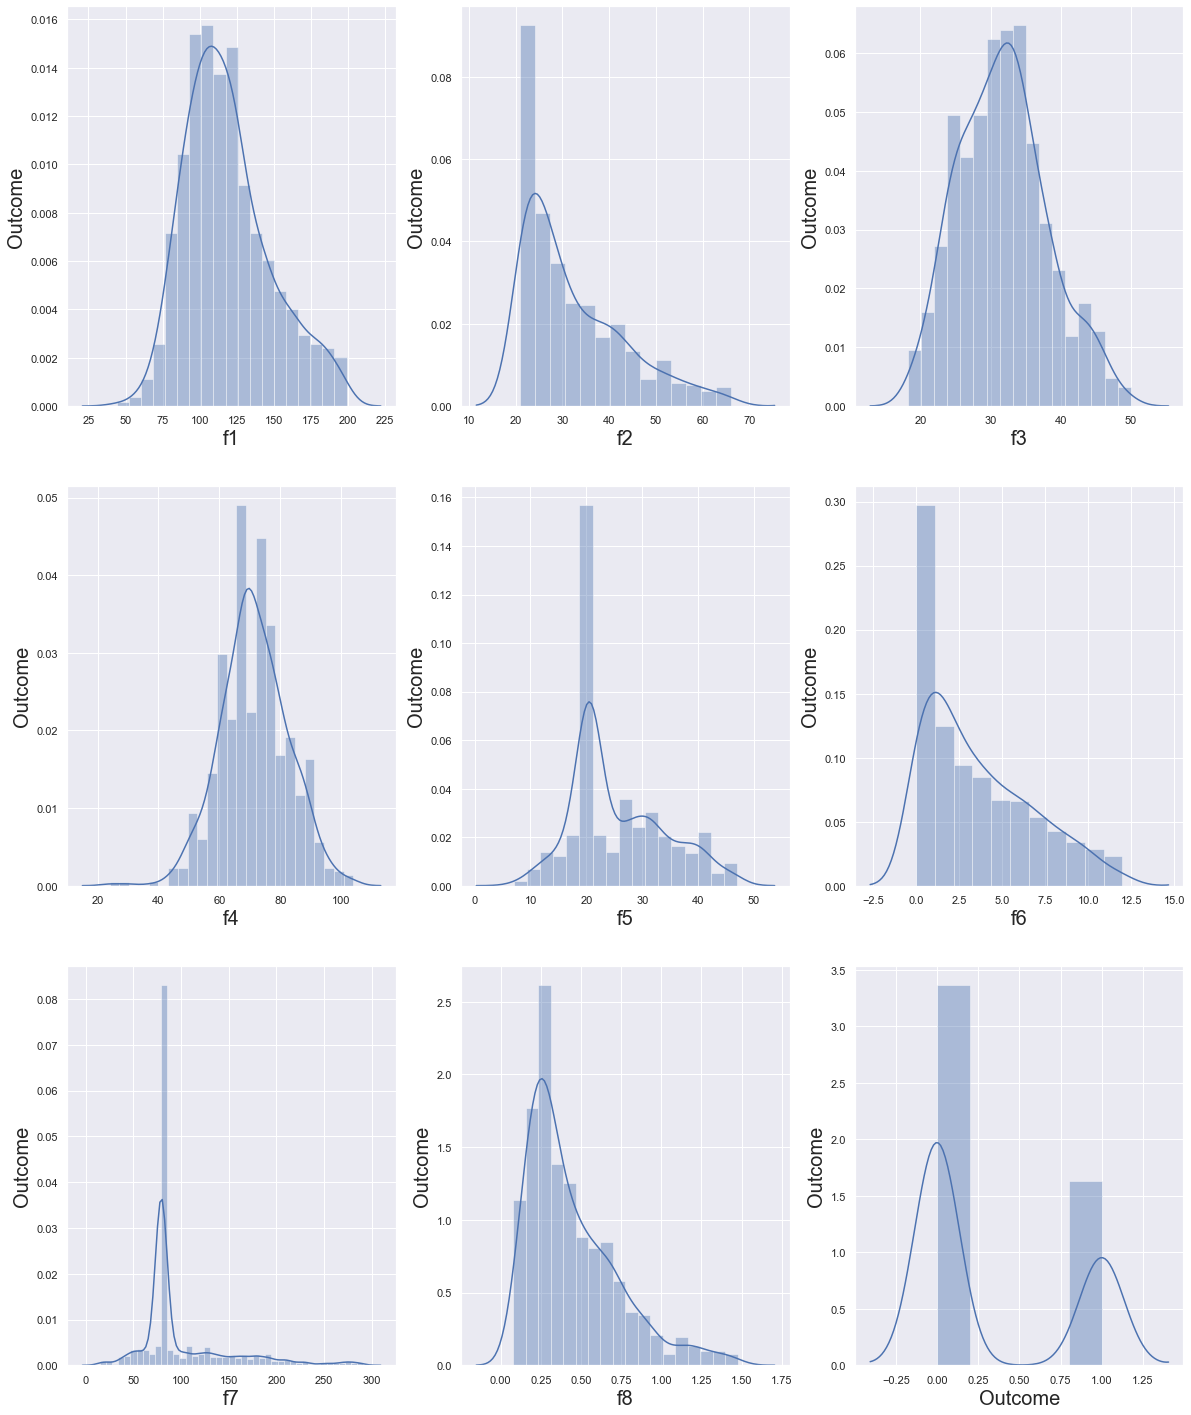

In [72]:
#Now seeing how data is distributed over each column
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in data_cleaned:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Outcome",fontsize=20)
    plotnumber+=1
plt.show()

In [73]:
#Seperating the features in X and label in y
X=data.drop(columns=["Outcome"])
y=data["Outcome"]

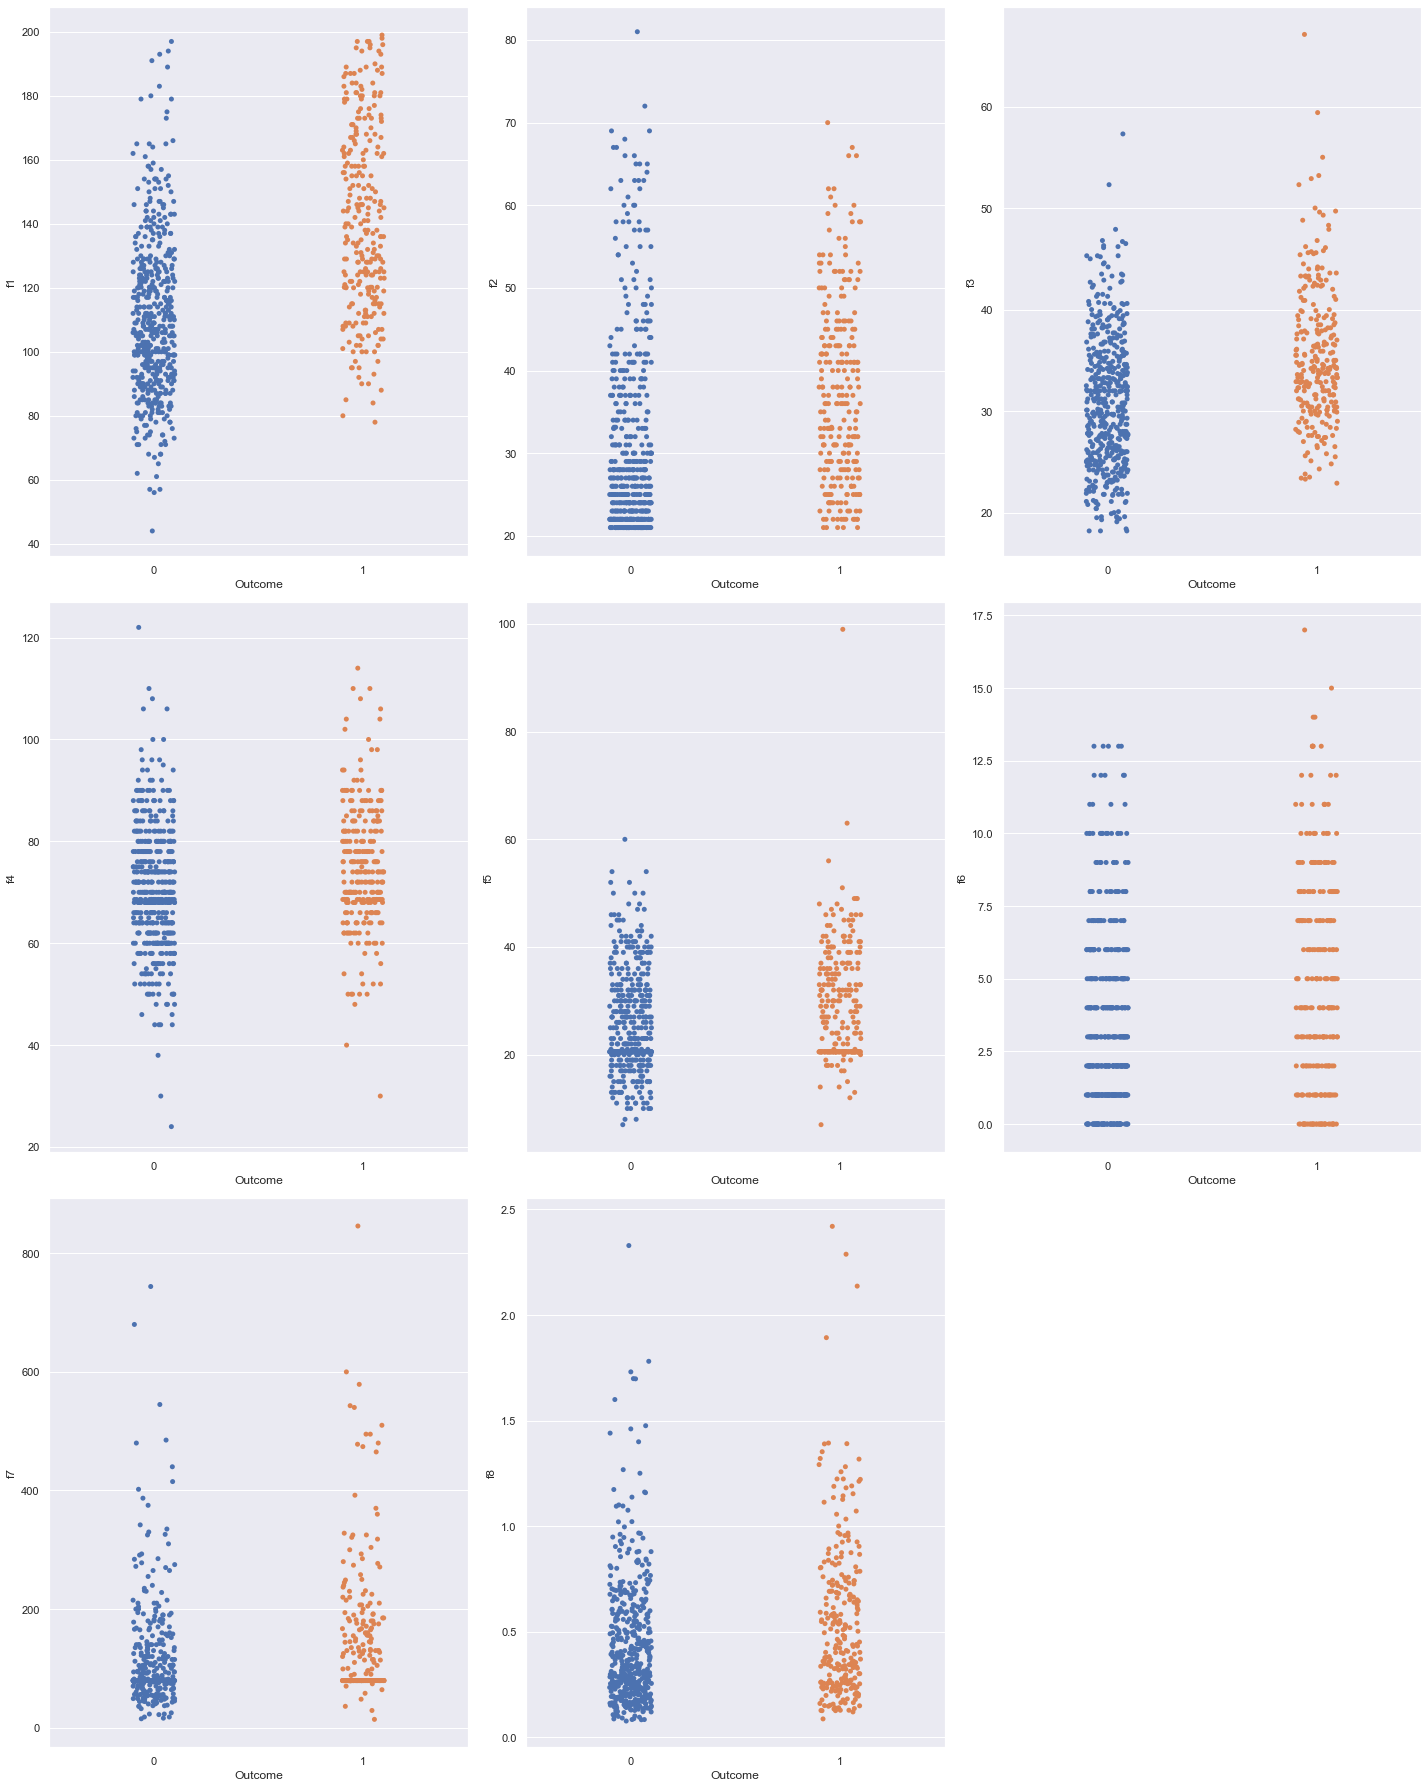

In [74]:
#seeing the data how it is distributed in each column by strip plot
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1

for column in X:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [75]:
#Scaling the data using StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)


In [76]:
X_scaled

array([[ 0.87269324,  1.42497217,  0.16725546, ...,  0.63994726,
        -0.4179534 ,  0.46849198],
       [-1.20809713, -0.19335429, -0.85153454, ..., -0.84488505,
        -0.4179534 , -0.36506078],
       [ 2.02868789, -0.10817921, -1.33182125, ...,  1.23388019,
        -0.4179534 ,  0.60439732],
       ...,
       [-0.01907406, -0.27852936, -0.90975111, ...,  0.3429808 ,
        -0.06844743, -0.68519336],
       [ 0.14606803,  1.16944694, -0.34213954, ..., -0.84488505,
        -0.4179534 , -0.37110101],
       [-0.94386978, -0.8747549 , -0.29847711, ..., -0.84488505,
        -0.4179534 , -0.47378505]])

In [77]:
#Finding out the variance inflation factor in each scaled column using X_scaled.shape[1]
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["features"]=X.columns
vif

,vif,features
0,1.346302,f1
1,1.612562,f2
2,1.554242,f3
3,1.252150,f4
4,1.450770,f5
5,1.432056,f6
6,1.260908,f7
7,1.057221,f8


In [78]:
#splitting the data into train data and test data.
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)


Here I am using Logistic Regression to build my model

In [79]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [80]:
import pickle
#writting different Model files to files
with open("ModelForPrediction.sav","wb") as f:
    pickle.dump(log_reg,f)
    
with open("Standard Scalar.sav","wb") as f:
    pickle.dump(scalar,f)

In [81]:
#Now predicting the data using the x_test
y_pred=log_reg.predict(x_test)

In [82]:
#Accuracy of the model
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7552083333333334

In [83]:
#Confusion Matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [84]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [85]:
#Accuracy using confusion matrix
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.7552083333333334

In [86]:
#precision
precision=true_positive/(true_positive+false_positive)
precision

0.88

In [87]:
#recall
recall=true_positive/(true_positive+false_negative)
recall

0.7746478873239436

In [88]:
#F1 Score
F1_Score=2*(recall*precision)/(recall+precision)
F1_Score

0.8239700374531835

# Now using Random Forest

In [89]:
#using the desicion tree classifier
clf=DecisionTreeClassifier(min_samples_split=2)
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [90]:
clf.score(x_test,y_test)#score using desicion tree

0.6927083333333334

In [91]:
#Decision tree with some parameters
clf2=DecisionTreeClassifier(criterion="entropy",max_depth=24,min_samples_leaf=1)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24)

In [92]:
clf2.score(x_test,y_test)#score with some parameters in D.T

0.6927083333333334

In [93]:
#Now Using RandomForestClassifier
rand_clf=RandomForestClassifier(random_state=6)

In [94]:
rand_clf.fit(x_train,y_train)#building the model using RandomForestClassifier

RandomForestClassifier(random_state=6)

In [95]:
rand_clf.score(x_test,y_test)#score Using RandomForest

0.765625

In [96]:
#Using Hyper Parameters for tuning
grid_param={
    "n_estimators":[90,100,110],
    "criterion":["gini","entropy"],
    "min_samples_leaf":[1,2,3],
    "min_samples_split":[1,2,3],
    "max_features":["auto","log2"]
}

In [97]:
#Using Hyper Parameters for tuning in GrdSearchCV
grid_search=GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)



In [98]:
grid_search.fit(x_train,y_train)#Building the model using GridSearchCV

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=6), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [90, 100, 110]},
             verbose=3)

In [99]:
#Finding the Best Parameters
grid_search.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [109]:
rand_clf1=RandomForestClassifier(criterion="entropy",
                               max_features="auto",
                               min_samples_leaf=2,
                               min_samples_split=3,
                               n_estimators=90,
                               random_state=6)

In [101]:
rand_clf2=RandomForestClassifier(criterion="gini",
                               max_features="auto",
                               min_samples_leaf=2,
                               min_samples_split=2,
                               n_estimators=90,
                               random_state=6)


In [110]:
rand_clf1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=3, n_estimators=90, random_state=6)

In [103]:
rand_clf2.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=90, random_state=6)

In [111]:
rand_clf1.score(x_test,y_test)

0.7604166666666666

In [105]:
rand_clf2.score(x_test,y_test)

0.7604166666666666

In [112]:
import pickle
#Writting the files using Pickle
with open("RandomForestClassifier.sav","wb") as f:
    pickle.dump(rand_clf,f)